In [10]:
import sys
sys.path.append('..') 

import shap
import pandas as pd
import numpy as np
import joblib
from Churn_predict.inference import make_predictions
from Churn_predict.preprocess import preprocess_data_with_objects
from Churn_predict import selected_features
import warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import xgboost as xgb
from shap import Explainer, Explanation
from shap import waterfall_plot


In [2]:
shap.initjs()

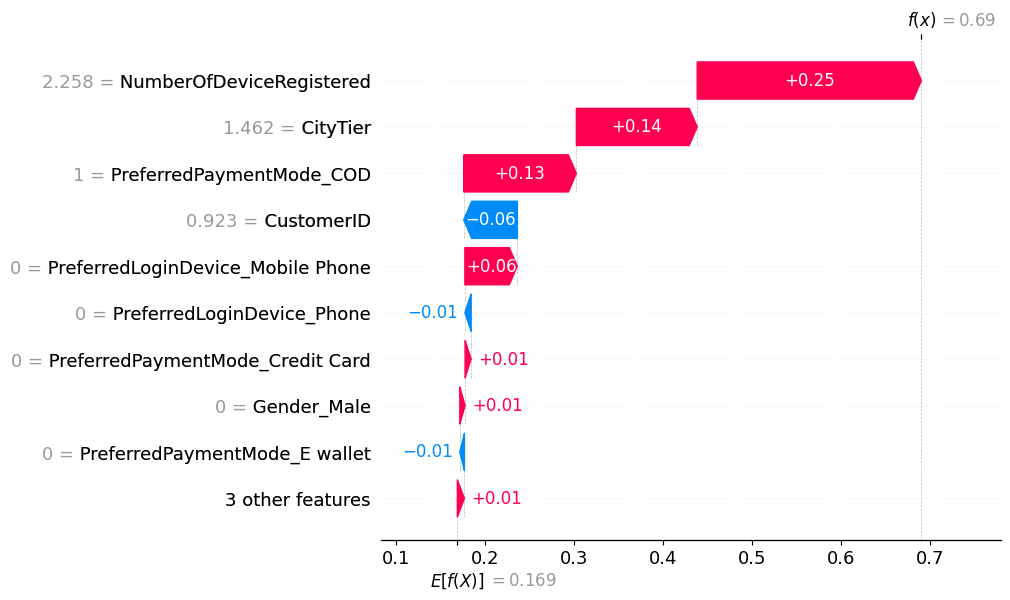

In [11]:

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the model
model = joblib.load('../models/model.joblib')

user_data_df = pd.read_csv('../data/test.csv')

user_data_selected = user_data_df[selected_features]

# Preprocess the data
processed_data = preprocess_data_with_objects(user_data_selected)

# Create an explainer object
explainer = Explainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(processed_data)

# Create Explanation object
exp = Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=processed_data,
    feature_names=processed_data.columns
)

# Index of the data point to explain
idx = 0  # First data point

# Create waterfall plot for the first data point
waterfall_plot(exp[idx])



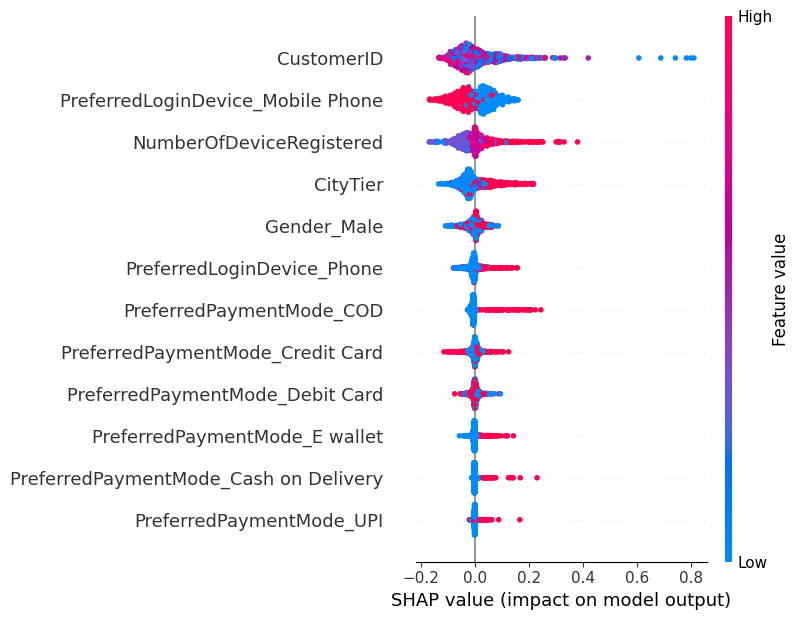

In [4]:
# Visualize explanations for all points of the data set at once
shap.summary_plot(shap_values, processed_data)

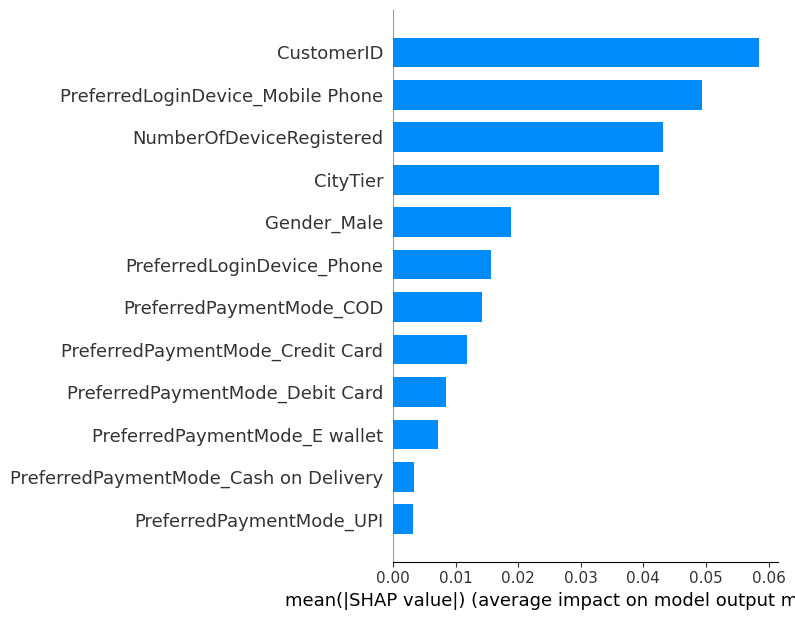

In [5]:
# Visualize a summary plot for each feature
shap.summary_plot(shap_values, processed_data, plot_type="bar")

In [6]:
data_point_index = 0
# Force Plot
shap.force_plot(explainer.expected_value, shap_values[data_point_index], processed_data.iloc[data_point_index])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


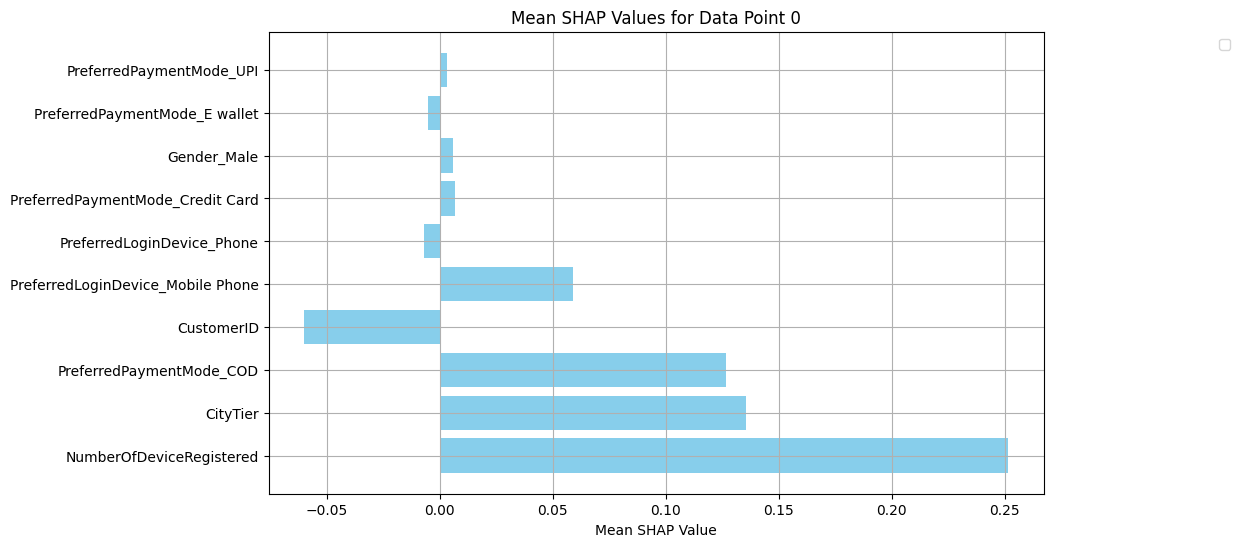

In [7]:


# Data point index
data_point_index = 0

# Reshape SHAP values for the specified data point
shap_values_data_point = shap_values[data_point_index]

# Get the absolute values of mean SHAP values
abs_mean_shap_values = np.abs(shap_values_data_point)

# Sort the features by absolute mean SHAP values
sorted_indices = np.argsort(abs_mean_shap_values)[::-1]

# Limit the number of features to display
max_display = 10
sorted_indices = sorted_indices[:max_display]

# Extract feature names
feature_names = processed_data.columns

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), shap_values_data_point[sorted_indices], color='skyblue')
plt.yticks(range(len(sorted_indices)), [feature_names[idx] for idx in sorted_indices])
plt.xlabel('Mean SHAP Value')
plt.title('Mean SHAP Values for Data Point {}'.format(data_point_index))
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


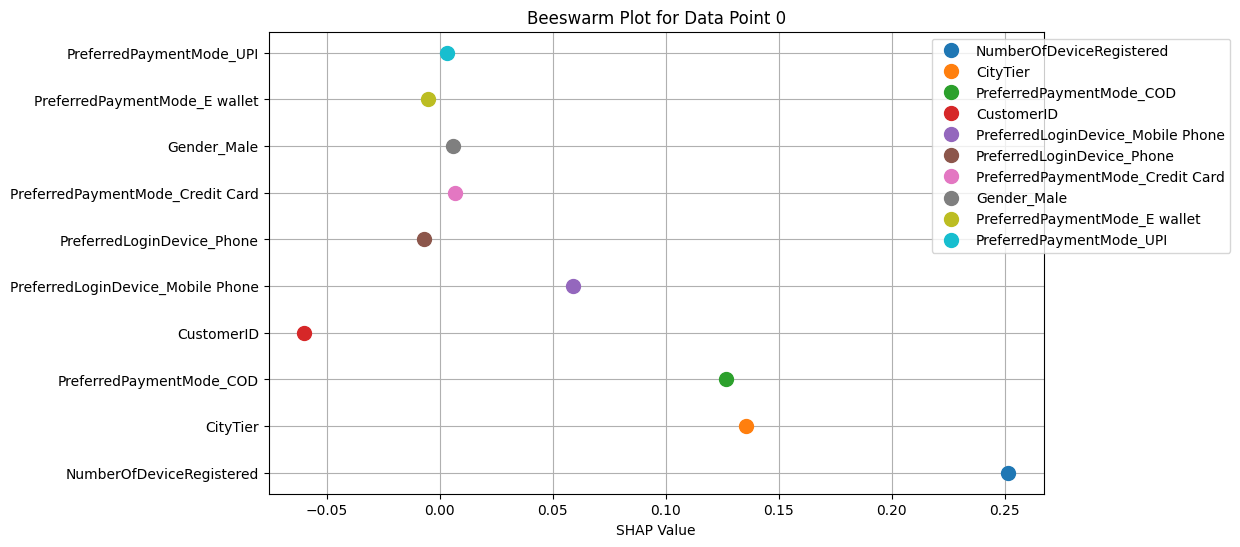

In [8]:
# Data point index
data_point_index = 0

# Reshape SHAP values for the specified data point
shap_values_data_point = shap_values[data_point_index]

# Get the absolute values of SHAP values
abs_shap_values = np.abs(shap_values_data_point)

# Sort the features by absolute SHAP values
sorted_indices = np.argsort(abs_shap_values)[::-1]

# Limit the number of features to display
max_display = 10
sorted_indices = sorted_indices[:max_display]

# Extract feature names
feature_names = processed_data.columns

# Plotting
plt.figure(figsize=(10, 6))
for i, idx in enumerate(sorted_indices):
    plt.plot(shap_values_data_point[idx], np.zeros_like(shap_values_data_point[idx]) + i, 'o', markersize=10, label=feature_names[idx])

plt.yticks(range(len(sorted_indices)), [feature_names[idx] for idx in sorted_indices])
plt.xlabel('SHAP Value')
plt.title('Beeswarm Plot for Data Point {}'.format(data_point_index))
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


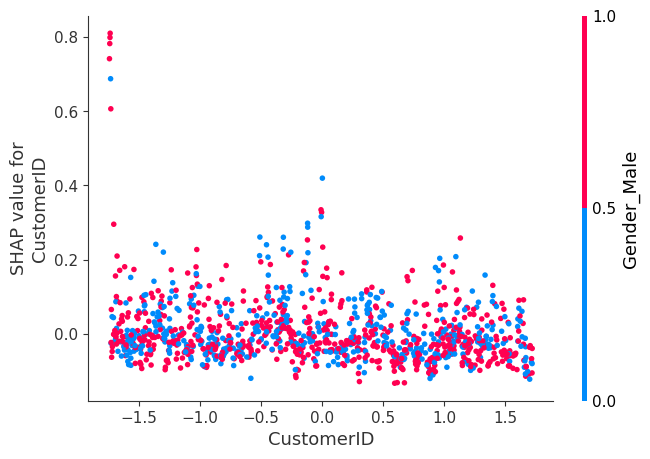

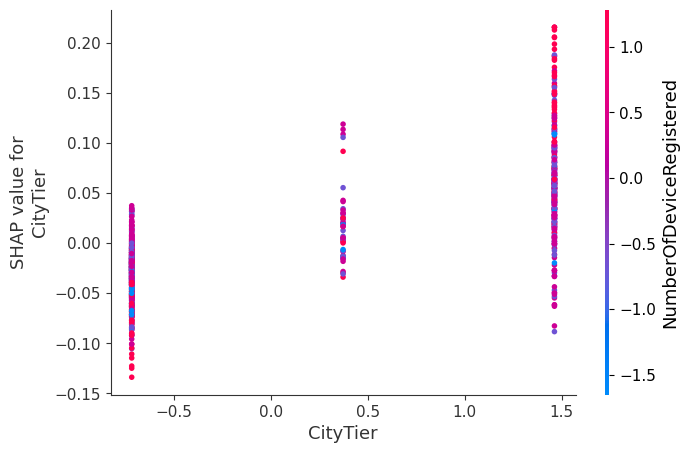

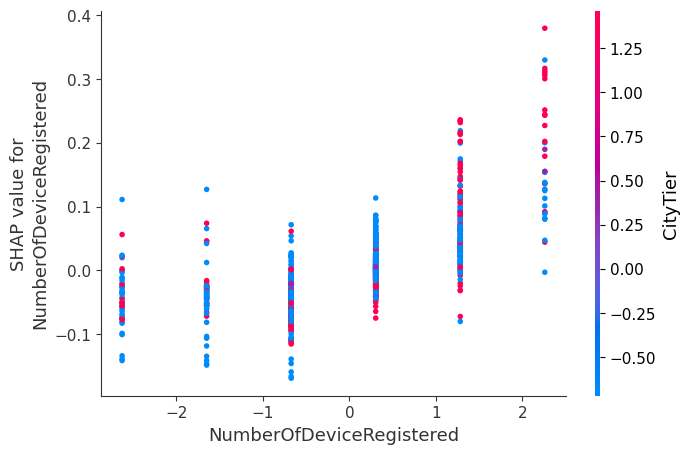

In [9]:


# Ensure that the selected features are present in the columns of the DataFrame
selected_features = [col for col in selected_features if col in processed_data.columns]


# Compute SHAP values
shap_values = explainer.shap_values(processed_data)

# Iterate over selected features to create dependence plots
for feature in selected_features:
    try:
        # Create dependence plot
        shap.dependence_plot(
            feature, 
            shap_values, 
            processed_data, 
            feature_names=processed_data.columns
        )
    except ValueError as e:
        print(f"Skipping {feature} due to error: {str(e)}")
